# Part I - (Airline Passenger Satisfaction)
## by (Valentine Ezenwanne)


<a id='tab'></a>
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Preliminary Wrangling</a></li>
    <ul>
        <li><a href="#assess">Assessment</a></li>
        <li><a href="#clean">Cleaning</a></li>
    </ul>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This dataset **Airline Passenger Satisfaction** contains survey on Customer satisfaction scores from 120,000+ airline passengers, including additional information about each passenger, their flight, and type of travel, as well as ther evaluation of different factors like cleanliness, comfort, service, and overall experience.

#### Variables Description
- **Age** : Age of the passenger

- **Customer Type** : Type of airline customer (First-time/Returning)

- **Type of Travel** : Purpose of the flight (Business/Personal)

- **Class** : Travel class in the airplane for the passenger seat

- **Flight Distance** : Flight distance in miles

- **Departure Delay** : Flight departure delay in minutes

- **Arrival Delay** : Flight arrival delay in minutes

- **Departure and Arrival Time Convenience** : Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Ease of Online Booking** : Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Check-in Service** : Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Online Boarding** : Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Gate Location** : Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **On-board Service** : Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Seat Comfort** : Satisfaction level with the comfort of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Leg Room Service** : Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Cleanliness** : Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Food and Drink** : Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **In-flight Service** : Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **In-flight Wifi Service** : Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **In-flight Entertainment** : Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Baggage Handling** : Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Satisfaction** : Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)




<a id='wrangle'></a>
## Preliminary Wrangling


**In this section, I will explore the shape, composition and types of the variables in the dataset**

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Setting the display maximum of column to 50 to ensure all columns are displayed(visible)
pd.set_option('display.max_columns', 50)

In [3]:
# Loading the dataset 
data = pd.read_csv('airline_passenger_satisfaction.csv')

In [4]:
# Displaying the first few lines of the data
data.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


- **Understanding the shape of the data**

In [5]:
# Determine the shape of the data
data.shape

(129880, 24)

The dataset contains 129,880 rows(observations) and 24 columns(variables)

- **Understanding the datatypes of the variables**

In [6]:
# determining the datatypes of the variables
data.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


The datatypes in the dataset include: **integers, floats and objects**. Some integer variables are categorical and will need to be converted to category

<a id='assess'></a>
### Assessing the dataset

In this section, I will assess the dataset for **quality issues** and **tidiness issues** by checking for 
- Missing values 
- Duplicates
- Incorrect datatypes

- **Checking for missing values in our dataset**

In [7]:
# Check for missing values
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

There are **393** missing values in the **Arrival delay**

- **Checking for duplicates in the dataset**

In [8]:
# Check for duplicates
data.duplicated().sum()

0

There are no duplicates for in dataset as a whole

In [9]:
# Check for duplicates in the column ID(since it uniquely identifies each observation)
data.duplicated(subset='ID').sum()

0

There are no duplicates in the 'ID' column

- **Checking for Incorrect Datatypes**

In [10]:
# Checking the datatypes of the variables
data.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


The variables: **Departure and Arrival Time Convenience, Ease of Online Booking, Check-in Service, Online Boarding, Gate Location, On-board Service, Seat Comfort, Leg Room Service, Cleanliness, Food and Drink, In-flight Service, In-flight Wifi Service, In-flight Entertainment, Baggage Handling** are specified as **integers** while they are **ordinal** variable having order from  1 (lowest) to 5 (highest) - 0 means "not applicable". 

They need to converted to **categorical**

- **Determining the unique values in the string variables**

In [11]:
# Displaying the unique values in the string variables

print('The unique values in Customer Types are: ', data['Customer Type'].unique())
print('The unique values in Type of Travel are: ',  data['Type of Travel'].unique())
print('The unique values in Class are: ', data['Class'].unique())
print('The unique values in Gender are: ',  data['Gender'].unique())
print('The unique values in Satisfaction are: ',  data['Satisfaction'].unique())

The unique values in Customer Types are:  ['First-time' 'Returning']
The unique values in Type of Travel are:  ['Business' 'Personal']
The unique values in Class are:  ['Business' 'Economy' 'Economy Plus']
The unique values in Gender are:  ['Male' 'Female']
The unique values in Satisfaction are:  ['Neutral or Dissatisfied' 'Satisfied']


**Each word are capitalized** (No inconsistency)

### Quality Issues
The quality issues observed in the dataset includes:
- Missing values (Arrival Delay column)
- Incorrect datatypes

<a id='clean'></a>
### Cleaning the Dataset

In this section, I will clean the quality issues observed during assessment

Before cleaning, I will make a copy of the dataset

In [12]:
# Creating a copy of the dataset
df = data.copy()

In [13]:
# Confirming a copy has been created by displaying the head
df.head(2)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied


#### Quality Issue1: Missing Values

In [14]:
# Take the descriptive statistics of the variable Arrival Delay
df['Arrival Delay'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64

The descriptive statistics shows that min(0), max(1584) and mean(15.091). This means that mean value may be affected by the maximum value, so filling in the missing values with the mean value may not be appropiate.

Since the missing values are 393 in total, the number is very small compare to our dataset which is greater than 120,000. So, I choose to drop the missing values

**Define**

- Drop the missing values 

**Code**

In [15]:
# Dropping the missing values
df.dropna(inplace=True)

**Test**

In [16]:
# Confirming the missing values have been dropped
df.isna().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

#### Quality Issue2: Incorrect Datatypes
Since the variables **Departure and Arrival Time Convenience, Ease of Online Booking, Check-in Service, Online Boarding, Gate Location, On-board Service, Seat Comfort, Leg Room Service, Cleanliness, Food and Drink, In-flight Service, In-flight Wifi Service, In-flight Entertainment, Baggage Handling** are ordinal variables, I need to convet it to Categorical data type

**Define**

- Convert the ordinal variables to categorical datatype

**Code**

In [17]:
# Converting to categorical datatype
df = df.astype({
    'Departure and Arrival Time Convenience': 'category',
    'Ease of Online Booking': 'category',
    'Check-in Service': 'category',
    'Online Boarding': 'category', 
    'Gate Location': 'category', 
    'On-board Service': 'category', 
    'Seat Comfort': 'category', 
    'Leg Room Service': 'category', 
    'Cleanliness': 'category', 
    'Food and Drink': 'category', 
    'In-flight Service': 'category', 
    'In-flight Wifi Service': 'category', 
    'In-flight Entertainment': 'category', 
    'Baggage Handling': 'category'
})

**Test**

In [18]:
# Confirming that the datatypes have been changed to categorical datatypes
df.dtypes

ID                                           int64
Gender                                      object
Age                                          int64
Customer Type                               object
Type of Travel                              object
Class                                       object
Flight Distance                              int64
Departure Delay                              int64
Arrival Delay                              float64
Departure and Arrival Time Convenience    category
Ease of Online Booking                    category
Check-in Service                          category
Online Boarding                           category
Gate Location                             category
On-board Service                          category
Seat Comfort                              category
Leg Room Service                          category
Cleanliness                               category
Food and Drink                            category
In-flight Service              

#### Data Composition after Assessment and Cleaning

In [19]:
# Checking the shape of the dataframe
df.shape

(129487, 24)

In [20]:
# descriptive statistics of the numeric variables
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,14.643385,15.091129
std,37489.781165,15.117597,997.560954,37.932867,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000
25%,32494.500000,27.000000,414.000000,0.000000,0.000000
50%,64972.000000,40.000000,844.000000,0.000000,0.000000
75%,97415.500000,51.000000,1744.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000


### Structure of the dataset

- There are 129,487 satisfaction survey records after cleaning has been done with 24 features. Most features are categorical variable while 4 features (Age, Flight Distance, Departure Delay, Arrival Delay) are numericals.

- The categorical variables are ordered from 1(lowest) to 5(highest) with zero(0) meaning 'not applicable'

### The main feature(s) of interest in the dataset

- I'm interested in finding out which features contributed to passengers satisfaction and dissatisfaction the most. 

### The features in the dataset I think will help support my investigation

- Among the categorical variables, I expect that features such as **Departure and Arrival Time Convenience, In-flight Service, In-flight Wifi Service** and **In-flight Entertainment**, **Food and Drinks**, **Seat Comfort and Leg Room Service**  will have strong effect on the overall satisfaction and dissatisfaction of the passengers.
- Among the numerical variable, I expect that **Flight Distance** will have strong effect on the satisfaction level of the passenger

<a id='univariate'></a>
## Univariate Exploration
In this section, i begin to explore each variable one after the other

I will start by exploring the numeric variable: **Departure Delay**. 
- I will look at the **distribution** of this variable **Departure Delay**


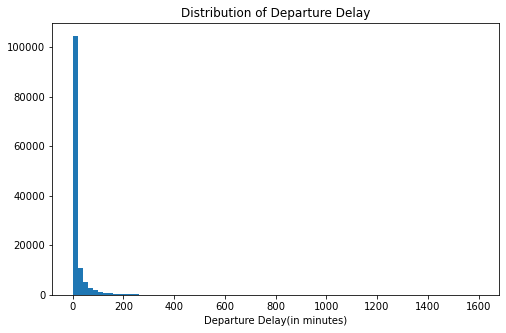

In [21]:
# Plotting a standard histogram scaled plot

binsize = 20 #setting the bin sizes
bins = np.arange(0, df['Departure Delay'].max()+binsize, binsize) #creating the bin ranges 

plt.figure(figsize=[8, 5])
plt.hist(data = df, x='Departure Delay', bins = bins)
plt.xlabel('Departure Delay(in minutes)')
plt.title('Distribution of Departure Delay')
plt.show()

The plot of **Departure Delay** shows that it is highly skewed to the right and most departure delay falls below 200 minutes.
I will perform a square root transformation on the x-scale to better explore the distribution of the feature. 

In [22]:
# Creating a function for square root transformation
def sqrt_trans(x, inverse=False):
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

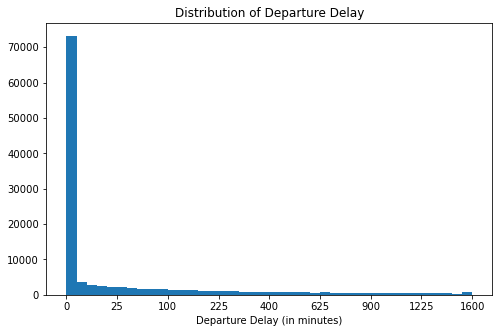

In [24]:
# Since the distribution show a high skewed distribution to the right, let put it on a square-root transformed scale

bins = np.arange(0, sqrt_trans(df['Departure Delay']).max()+1, 1)  #creating the bin ranges 

plt.figure(figsize=[8, 5])
plt.hist(data = df, x='Departure Delay', bins = bins)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 25, 100, 225, 400, 625, 900, 1225, 1600])
plt.xlabel('Departure Delay (in minutes)')
plt.title('Distribution of Departure Delay')
plt.show()

The distribution of the Departure Delay time shows a long tail distribution to the right. The plot shows a sharp peak at zero(0), which indicates that more than 70,000 passenger never experience delay in departure of their flight

- I will explore the next numerical variable: **Arrival Delay**

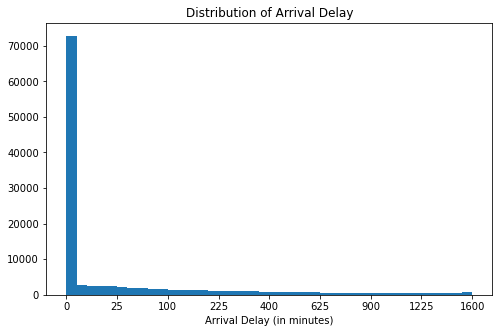

In [25]:
# I willput it on a square-root transformed scale
bins = np.arange(0, sqrt_trans(df['Arrival Delay']).max()+1, 1)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x='Arrival Delay', bins = bins)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40], [0, 25, 100, 225, 400, 625, 900, 1225, 1600])
plt.xlabel('Arrival Delay (in minutes)')
plt.title('Distribution of Arrival Delay')
plt.show()

The distribution of the **Arrival Delay(in minutes)** shows similiar distribution to **Departure Delay**, a highly positive skew with long tail.
This tends to align with the assumption that if there is delay in departure time, then there should be delay in Arrival time

- Exploring the third numerical variable: **Flight Distance**

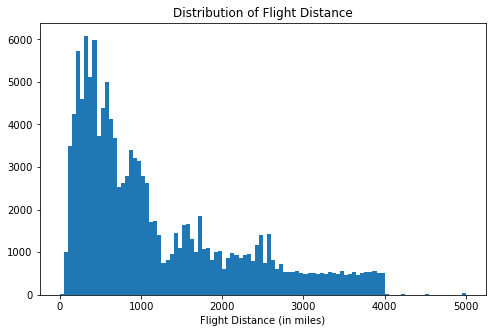

In [26]:
# Plotting a standard histogram for flight distance

binsize = 50 #setting the bin sizes
bins = np.arange(0, df['Flight Distance'].max()+binsize, binsize) #creating the bin ranges 

plt.figure(figsize=[8, 5])
plt.hist(data = df, x='Flight Distance', bins = bins)
plt.xlabel('Flight Distance (in miles)')
plt.title('Distribution of Flight Distance')
plt.show()

In [27]:
# taking logarithm of the descriptive statistics to know the maximum and minimum for scaling
np.log10(df['Flight Distance'].describe())

count    5.112226
mean     3.075624
std      2.998939
min      1.491362
25%      2.617000
50%      2.926342
75%      3.241546
max      3.697491
Name: Flight Distance, dtype: float64

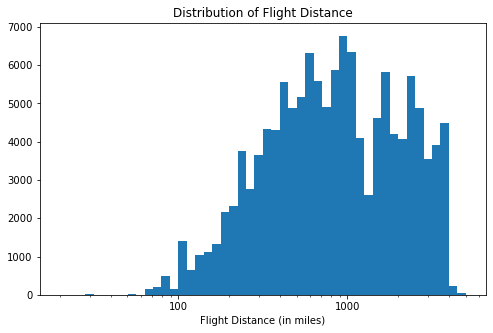

In [28]:
# Plotting it on a log transformed scale

bins = 10**np.arange(1.3, 3.7+0.05, 0.05)   #creating bin edges based on log10 of the descriptive statistics 

plt.figure(figsize=[8, 5])
plt.hist(data = df, x='Flight Distance', bins = bins)
plt.xscale('log')
plt.xticks([1e2, 1e3], [100, 1000])
plt.xlabel('Flight Distance (in miles)')
plt.title('Distribution of Flight Distance')
plt.show()

The plot show that distribution of the Flight Distance is bimodal, with the first mode below a distance of 1000 miles and the second mode above 1000 miles.

- Exploring the distribution of the fourth numerical variable: **Age**

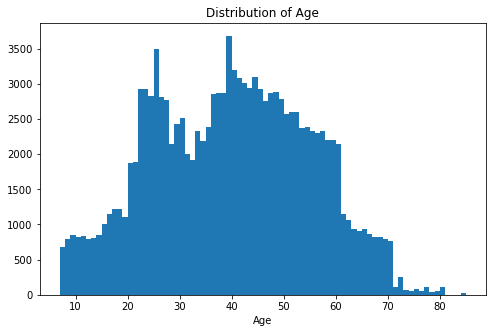

In [29]:
#Plotting a standard histogram for Age feature

bins = np.arange(df['Age'].min(), df['Age'].max()+1, 1)
plt.figure(figsize=[8,5])
plt.hist(data=df, x='Age', bins=bins)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

The figure shows a bimodal distribution for Age. The first peak age distribution is between 22 to 30 years. This first set of distribution might be travelling for personal reason. The second peak distribution is between 35-45 years which represent age distribution of passenger who may be repeating customers and may travel often for business.

### Exploration of Categorical Variables

- I will start by exploring the **nominal** categorical features: **(Gender, Customer Type, Type of Travel, Class)**

##### Exploring the "Gender" and "Customer Type" together

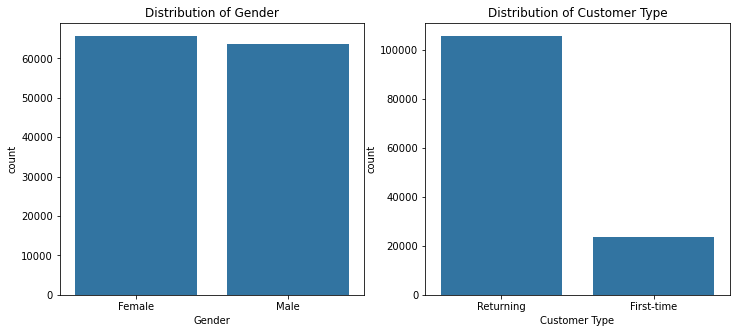

In [30]:
# Plotting a standard countplot of the features(Gender and Customer Type) together

plt.figure(figsize = [12,5])
default_color = sns.color_palette()[0]
gender_order = df['Gender'].value_counts().index
c_order = df['Customer Type'].value_counts().index

plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'Gender', color = default_color, order=gender_order)
plt.title('Distribution of Gender')

plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'Customer Type', color = default_color, order=c_order)
plt.title('Distribution of Customer Type')
plt.show()

##### Exploring "Type of Travel" and "Class" together

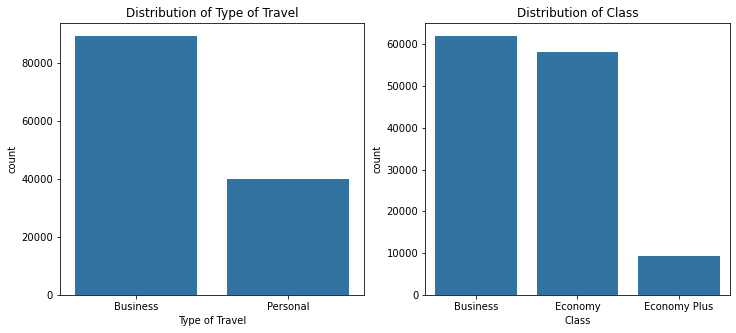

In [31]:
# Plotting a standard countplot of the features(Type of Travel and Class) together

plt.figure(figsize = [12,5])

default_color = sns.color_palette()[0]

plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'Type of Travel', color = default_color)
plt.title('Distribution of Type of Travel')

plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'Class', color = default_color)
plt.title('Distribution of Class')

plt.show()

##### Exploring the variable "Satisfaction"

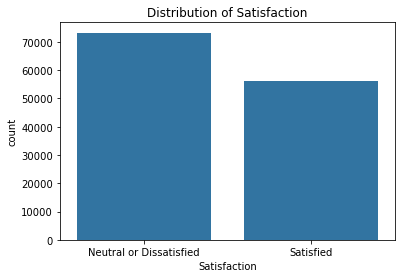

In [32]:
# Plotting a standard countplot of the features(Satisfaction)
plt.figure(figsize = [6,4])

default_color = sns.color_palette()[0]

sns.countplot(data = df, x = 'Satisfaction', color = default_color)
plt.title('Distribution of Satisfaction')
plt.show()

The number of Female passengers are just a little higher than the Male passengers and more than 100,000 (i.e greater than 80%) of this passengers are Returning (*Loyal*) Passengers. 

The chart shows that more than *80,000* passengers travels for *business* purposes while the rest travels for personal reasons. 

The two most popular flight classes are **business** and **economy**. A little above 60,000 passengers pay for business class which is a litte higher than **Economy Class**. Less than 10,000 subscribe for economy plus class.

More than half of the passenger(about **72,000**) surveyed are either **Neutral or Dissatisfied**. This means some features may have contributed to the overall dissatisfaction of the passenger and that is what i wish to find out.

### Exploring the **Ordinal** categorical features

I will explore the variable that has to do with inflight (i.e during an aircraft flight): 
These variables include: **In-flight Service, In-flight Wifi Service, In-flight Entertainment, Food and Drink, Seat Comfort, Leg Room Service, Cleanliness and On-board Service** 

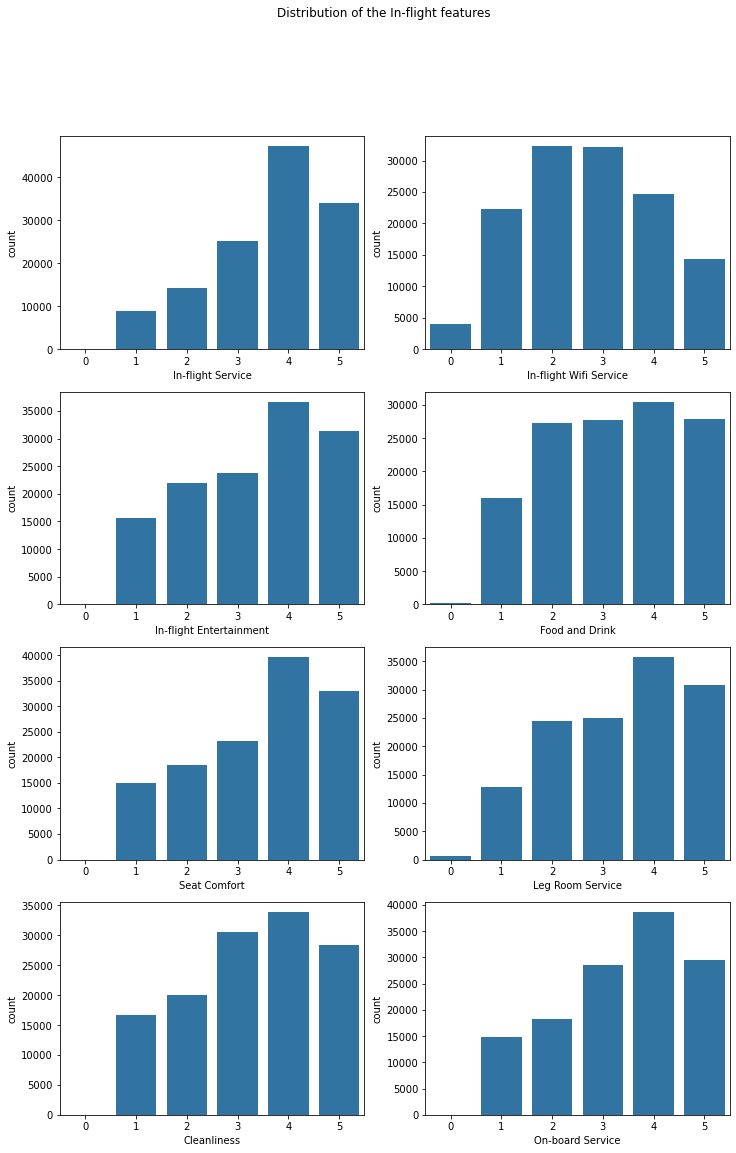

In [34]:
""" Plotting a standard countplot of the features(In-flight Service, In-flight Wifi Service, In-flight Entertainment, 
Food and Drink, Seat Comfort, Leg Room Service, Cleanliness) together """

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=[12,18])
default_color = sns.color_palette()[0]

sns.countplot(data= df, x='In-flight Service', color=default_color, ax=axes[0, 0])
sns.countplot(data= df, x='In-flight Wifi Service', color=default_color, ax=axes[0, 1])
sns.countplot(data= df, x='In-flight Entertainment', color=default_color, ax=axes[1, 0])
sns.countplot(data= df, x='Food and Drink', color=default_color, ax=axes[1, 1])
sns.countplot(data= df, x='Seat Comfort', color=default_color, ax=axes[2, 0])
sns.countplot(data= df, x='Leg Room Service', color=default_color, ax=axes[2, 1])
sns.countplot(data= df, x='Cleanliness', color=default_color, ax=axes[3, 0])
sns.countplot(data= df, x='On-board Service', color=default_color, ax=axes[3, 1])
fig.suptitle('Distribution of the In-flight features')
plt.show()

The inflight features had high ratings with score 4 being the most rated. The inflight entertainment and inflight service were rated high, while the inflight wifi service had a average to low rating. This might result from the interference of weather with internet connection.

The seat comfort and leg room service had high ratings of 4 and 5. This high rating might be coming from passenger who uses business class which is known to have a good seat comfort and leg room service. It may also be coming from the economy class that do not enjoy the perks of business class, so it need further investigation among the type of classes.  

Food and Drinks rating seems to be high but quite a number of passengers rated it average or low, and this might also be from the economy class. But further investigation will reveal where the average rating is coming from whether it is from economy class or other classes

Cleanliness and On-board Service had a high rating, but i don't know if the rating is good or bad, therefore further investigation is needed

**Note:** It is important to note that these ratings may be a **Satisfaction** or **Dissatisfaction rating**, and further investigation of these features with satisfaction will reveal what kind.

### Exploring the other Ordinal variables

**Departure and Arrival time, Ease of Online Booking, Check-in Service, Online Boarding, Gate Location, On-board Service, Baggage Handling**

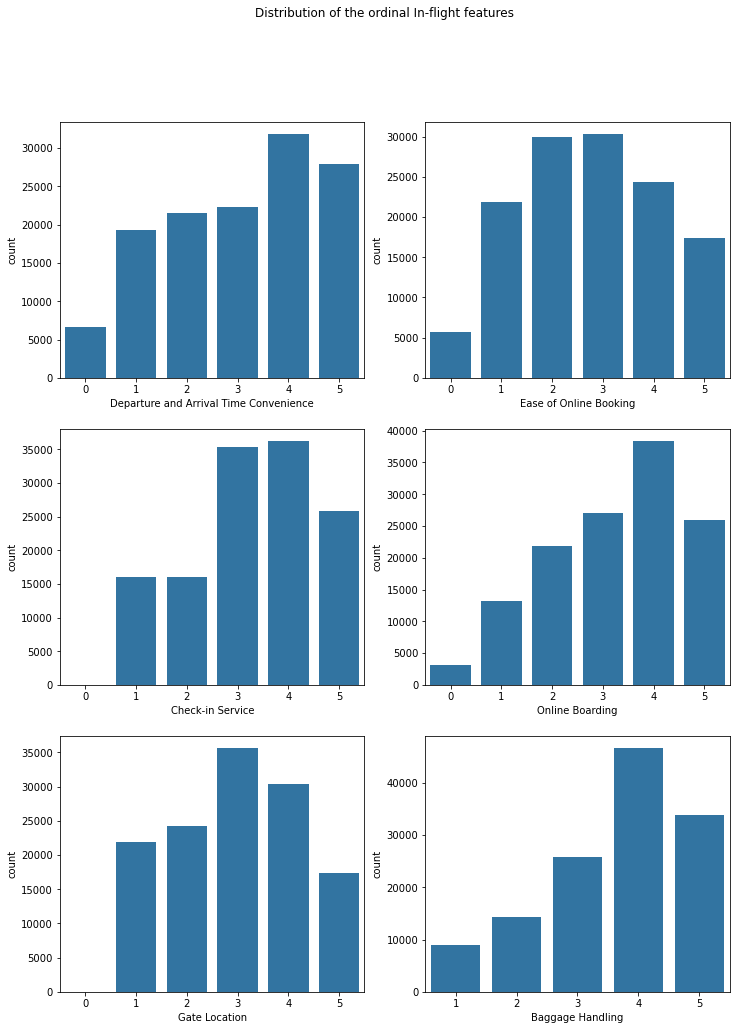

In [35]:
""" Plotting a standard countplot of the features(Departure and Arrival time, Ease of Online Booking, Check-in Service, 
Online Boarding, Gate Location, On-board Service, Baggage Handling) together """

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[12,16])
default_color = sns.color_palette()[0]


sns.countplot(data= df, x='Departure and Arrival Time Convenience', color=default_color, ax=axes[0, 0])
sns.countplot(data= df, x='Ease of Online Booking', color=default_color, ax=axes[0, 1])
sns.countplot(data= df, x='Check-in Service', color=default_color, ax=axes[1, 0])
sns.countplot(data= df, x='Online Boarding', color=default_color, ax=axes[1, 1])
sns.countplot(data= df, x='Gate Location', color=default_color, ax=axes[2, 0])
sns.countplot(data= df, x='Baggage Handling', color=default_color, ax=axes[2, 1])
fig.suptitle('Distribution of the ordinal In-flight features')
plt.show()

There are several features that had a high ratings such as **Departure and Arrival Time Convenience**, **On-Board Service**, **Online Boarding**, **Check-in Service** and **Baggage Handling**

The **Gate Location** seems to be on the average rating while **Ease of Online Booking** had an average to low rating. This could be that the passengers are having difficulty navigating the website or app to book their flight and will require further investigation

Just like i noted earlier that these ratings may be a **Satisfaction or Disatisfaction rating**, and further investigation of these features with satisfaction will reveal what kind.

### Distribution of the variables

The Departure Delay and Arrival Delay are highly positively skewed and under square-root transformation it still shows a highly positive skew with tall peak at zero(0) minutes indicating that majority of the passengers do not experience delay in Arrival or Departure.

The Flight Distance showed a bimodal distribution under log transformation of the x-axis, with the first mode below a distance of 1000 miles and the second mode above 1000 miles.The Age also showed a bimodal distribution, the first peak age distribution is between 22-30 years while the second peak age distribution is between 35-45 years.

The distribution of the **customer type** showed that more than half of the passengers are **returning** passengers and the **type of travel** showed that they travels mostly for **business** purposes while **Class** reveals that these passengers uses either business class or economy class.

Generally, in terms of the ordinal variables, there is a progressive increase in the number of counts as we progress from rating 1-5, and rating 4, seem to be the most rated score



<a id='bivariate'></a>
## Bivariate Exploration


To begin the bivariate exploration, First, I will look at the pairwise correlations present between the numeric features in the data.

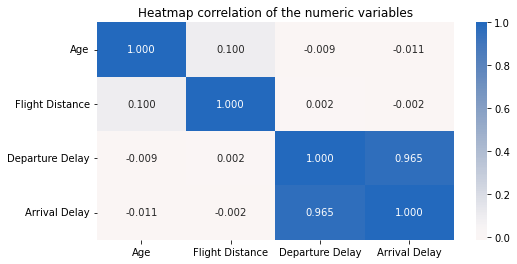

In [36]:
# Plotting a correlation heatmap of the numeric variables

numeric_vars = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay'] #selecting the numeric variables
plt.figure(figsize=[8, 4])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Heatmap correlation of the numeric variables')
plt.show()

In [37]:
# Resetting the index of the dataframe since there are missing index due to the rows that were dropped during cleaning
df.reset_index(inplace=True)

In [38]:
#dropping the column 'index' which was created due to resetting index

df.drop('index', axis=1, inplace=True)

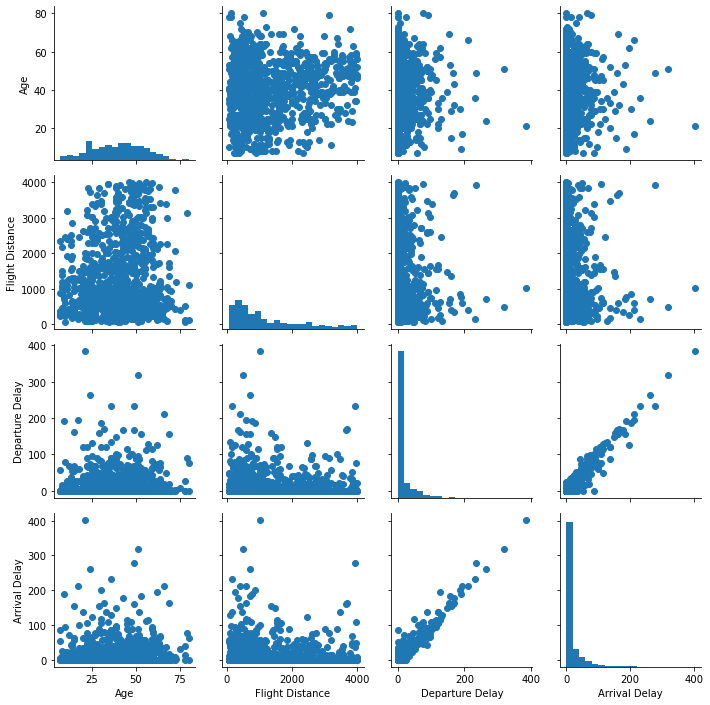

In [40]:
# Plotting a pairGrid matrix plot of the numeric variables

# Selecting a sample of the data for pairGrid plot
samples = np.random.choice(df.shape[0], 1000, replace=False)
df_subset = df.loc[samples, :]

g = sns.PairGrid(data = df_subset, vars = numeric_vars)
g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.show()

The correlation heatmap showed a **strong positive** relationship between **Departure Delay and Arrival Delay**. This is also depicted by the pairwise scatter plot. It is right to say that if an airline leaves the airport late, then it will arrive its destination late. The other pairwise variables show no correlation.

#### Let's look at the Arrival Delay and Departure Delay variable

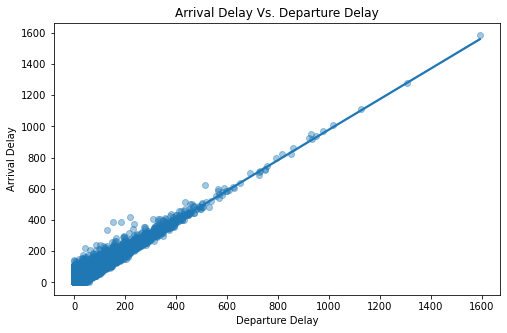

In [41]:
# Let's look at the correlation between Departure Delay and Arrival Delay

# Selecting a sample of the data for scatter plot
samples = np.random.choice(df.shape[0], 5000, replace=False)
df_subset = df.loc[samples, :]

# Creating a scatter plot of the departure delay and arrival delay
plt.figure(figsize=[8,5])
sns.regplot(data=df, x='Departure Delay', y='Arrival Delay', color=default_color, x_jitter=0.3, scatter_kws={'alpha': 0.4})
plt.title('Arrival Delay Vs. Departure Delay')
plt.show()

The scatter plot shows a **positive correlation** betweeen Arrival Delay and Departure Delay which implies that if there is increase in departure delay time invariably, there will be an increase in arrival delay time

### Numerical variable vs. Categorical variable exploration

#### I want to explore the relationship between the numeric variable (Age) and some categorical variable (Gender, Customer Type, Class, Type of Travel and Satisfaction)


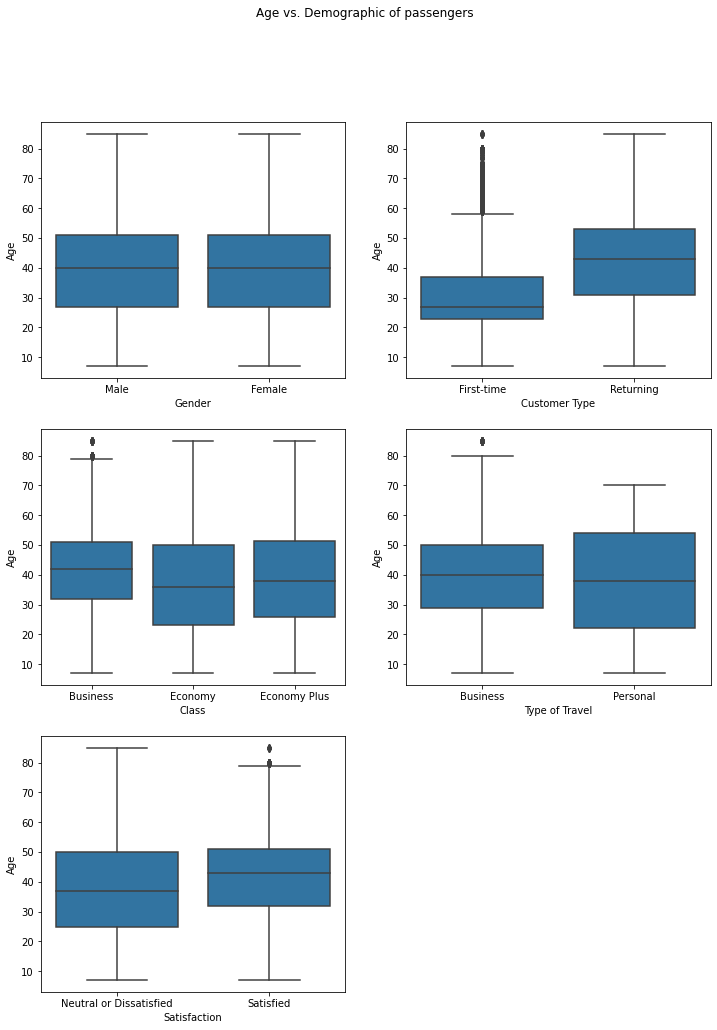

In [43]:
# plotting a boxplot of Age and some categorical variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[12,16])
default_color = sns.color_palette()[0]


sns.boxplot(data=df, x='Gender', y='Age', color=default_color, ax=axes[0,0])
sns.boxplot(data=df, x='Customer Type', y='Age', color=default_color, ax=axes[0, 1])
sns.boxplot(data=df, x='Class', y='Age', color=default_color, ax=axes[1, 0])
sns.boxplot(data=df, x='Type of Travel', y='Age', color=default_color, ax=axes[1, 1])
sns.boxplot(data=df, x='Satisfaction', y='Age', color=default_color, ax=axes[2, 0])
fig.delaxes(axes[2][1])     #this code remove the empty subplot on the axes
fig.suptitle('Age vs. Demographic of passengers')
plt.show()

The median age of both the male and female is 40years. Both have the same age range.

The median age of first time passenger is a little above 25 years with small age range of 22-38 years, while for returning passenger their median age lies a little above 40 years with a wide age range that span 32 to 53 years. There are outliers in the first time passengers, these could be from entry error, or that these first time passenger are aged adult who may probably be going on vacation or visiting relatives.

The median age of passenger who uses Business Class is a little above 40 years but has a short age range of 30-50 years. This is followed by economy plus with median age of about 38 years and then economy class with median age of 35 years with a wide age range which span 22 to 50 years. It is right to say that Adult above 40 years prefer to go with business class when they are travelling for business purpose.  These can also be seen from the median age of passengers who travel for the sole purposes of business.

The median age of passenger who are satisfied lies above 40 years with a small age range and these may be passengers who uses business class and enjoys the perks associated with business class. A wide age range of passengers are dissatisfied.

#### I want to explore the relationship between the numeric variable (Flight Distance) and some categorical variable (Customer Type, Class, Type of Travel and Satisfaction)


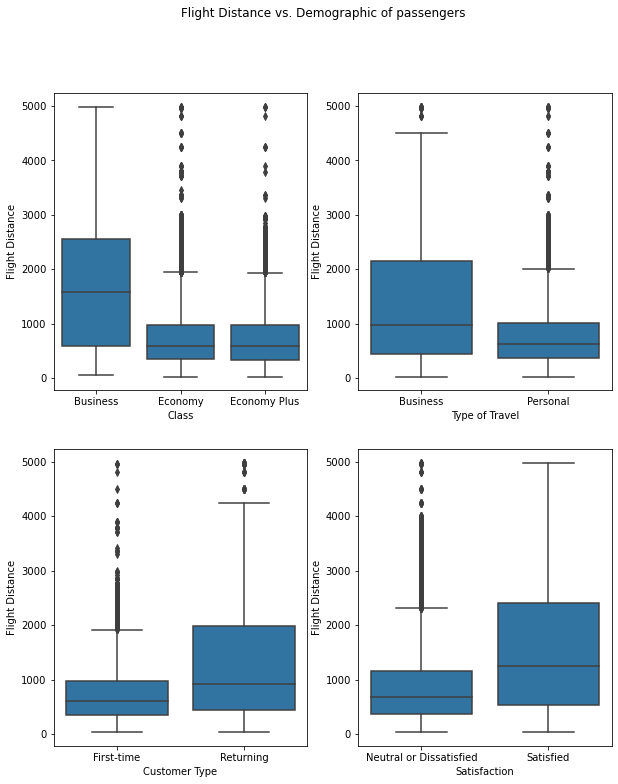

In [44]:
# plotting a boxplot of Flight Distance and some ordinal variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[10,12])
default_color = sns.color_palette()[0]

sns.boxplot(data=df, x='Class', y='Flight Distance', color=default_color, ax=axes[0, 0])
sns.boxplot(data=df, x='Type of Travel', y='Flight Distance', color=default_color, ax=axes[0,1])
sns.boxplot(data=df, x='Customer Type', y='Flight Distance', color=default_color, ax=axes[1, 0])
sns.boxplot(data=df, x='Satisfaction', y='Flight Distance', color=default_color, ax=axes[1, 1])
fig.suptitle('Flight Distance vs. Demographic of passengers')
plt.show()

The box plot show that passengers who travel long distance like to use the business class while passengers travelling short distances uses Economy and Economy Plus. 

These passengers travelling long distances travel for the sole purpose for business while passengers travelling short distance are travelling for personal reasons.

The category of passengers travelling long distances are returning passengers while first-time passengers travels short distances

These passengers which travels long distances show greater satisfaction than passengers who travels short distances

#### I want to explore the relationship between the numeric variable (Flight Distance) and some ordinal categorical variable (In-flight Service, In-flight Wifi Service, In-flight Entertainment, Seat Comfort, Leg Room Service, Food and Drink)

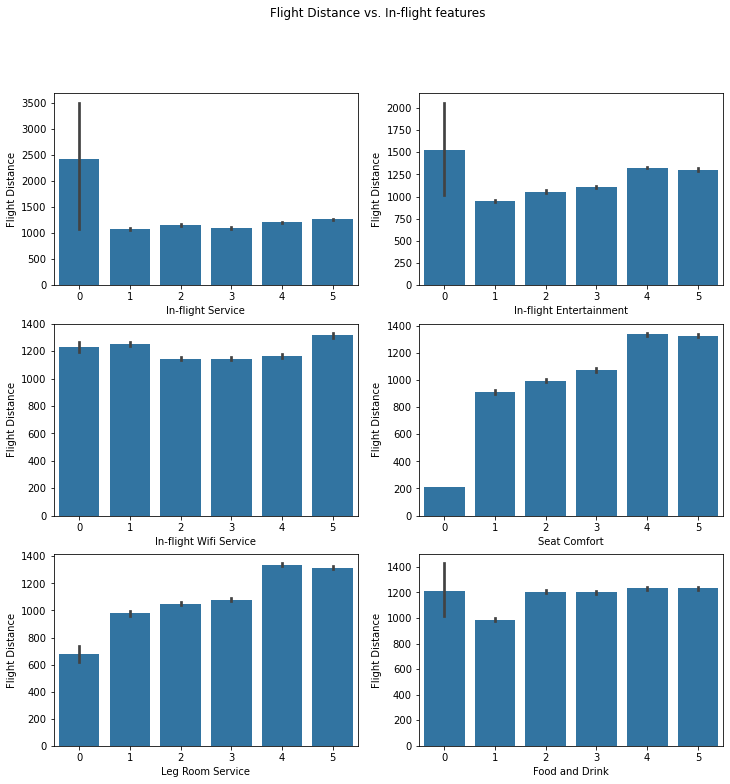

In [46]:
# plotting a barplot of Flight Distance and some ordinal variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[12,12])
default_color = sns.color_palette()[0]

sns.barplot(data=df, x='In-flight Service', y='Flight Distance', color=default_color, ax=axes[0, 0])
sns.barplot(data=df, x='In-flight Entertainment', y='Flight Distance', color=default_color, ax=axes[0,1])
sns.barplot(data=df, x='In-flight Wifi Service', y='Flight Distance', color=default_color, ax=axes[1, 0])
sns.barplot(data=df, x='Seat Comfort', y='Flight Distance', color=default_color, ax=axes[1, 1])
sns.barplot(data=df, x='Leg Room Service', y='Flight Distance', color=default_color, ax=axes[2, 0])
sns.barplot(data=df, x='Food and Drink', y='Flight Distance', color=default_color, ax=axes[2, 1])
fig.suptitle('Flight Distance vs. In-flight features')
plt.show()

The above plot shows that as **average flight distance** increases the ratings also **increase** progressively from 1-5 with features such as **In-flight Service, In-flight Entertainment, Seat Comfort, Leg Room Service.**

The In-flight Wifi Service showed a high rating of 5 for the highest average flight distance, but this high rating may be a satisfaction or dissatisfaction, and so further investigation is required.

Food and Drink ratings are relatively the same for the average flight distance travelled

### Categorical vs. Categorical variable exploration

In this section, I want to explore the relationship between **Satisfaction** and each categorical features, to see how the passengers rated their satisfaction of these features

I will start by exploring **Satisfaction** and some features **(Type of Travel, Class, Customer Type, Gender)**

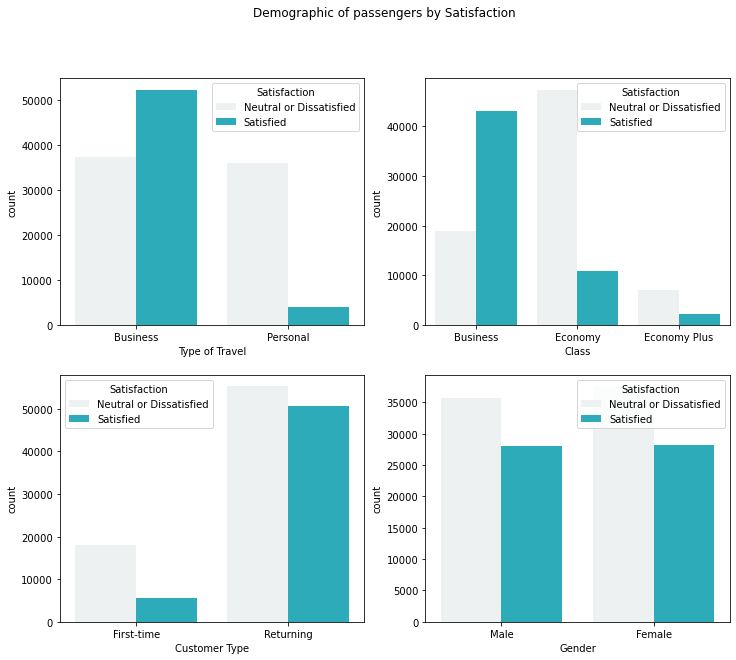

In [48]:
# plotting a clustered bar charts of Satisfaction and some nominal variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,10])
default_color = sns.color_palette()[9]

sns.countplot(data=df, x='Type of Travel', hue='Satisfaction', color=default_color, ax=axes[0,0])
sns.countplot(data=df, x='Class', hue='Satisfaction', color=default_color, ax=axes[0, 1])
sns.countplot(data=df, x='Customer Type', hue='Satisfaction', color=default_color, ax=axes[1, 0])
sns.countplot(data=df, x='Gender', hue='Satisfaction', color=default_color, ax=axes[1, 1])
fig.suptitle('Demographic of passengers by Satisfaction')
plt.show()

The above plot shows that there is high number of passenger who are satisfied among passengers travelling for business reasons, while greater number of passengers who travel for personal reason had a dissatisfaction or choose to remain neutral.

As expected, most passengers who travelled on economy class are dissatisfied compared to passenger travelling on business class where there is greater number of satisfaction.

There is greater number of dissatisfaction among returning passengers than those that are satisfied, the same occured among the first-time passengers. Both gender show almost equal dissatisfaction and satisfaction.

#### Exploring **Satisfaction** and other In-flight features

In the univariate exploration, I looked at the ratings of each features, some had quite high ratings such as In-flight service, In-flight Entertainment, Seat Comfort, Leg Room Service, Cleanliness and Departure and Arrival Time Convenience. I don't know if this high ratings are good or bad, so in this section I will explore each feature against the **Satisfaction** to find out if the ratings are as a result of satisfaction or dissatisfaction.

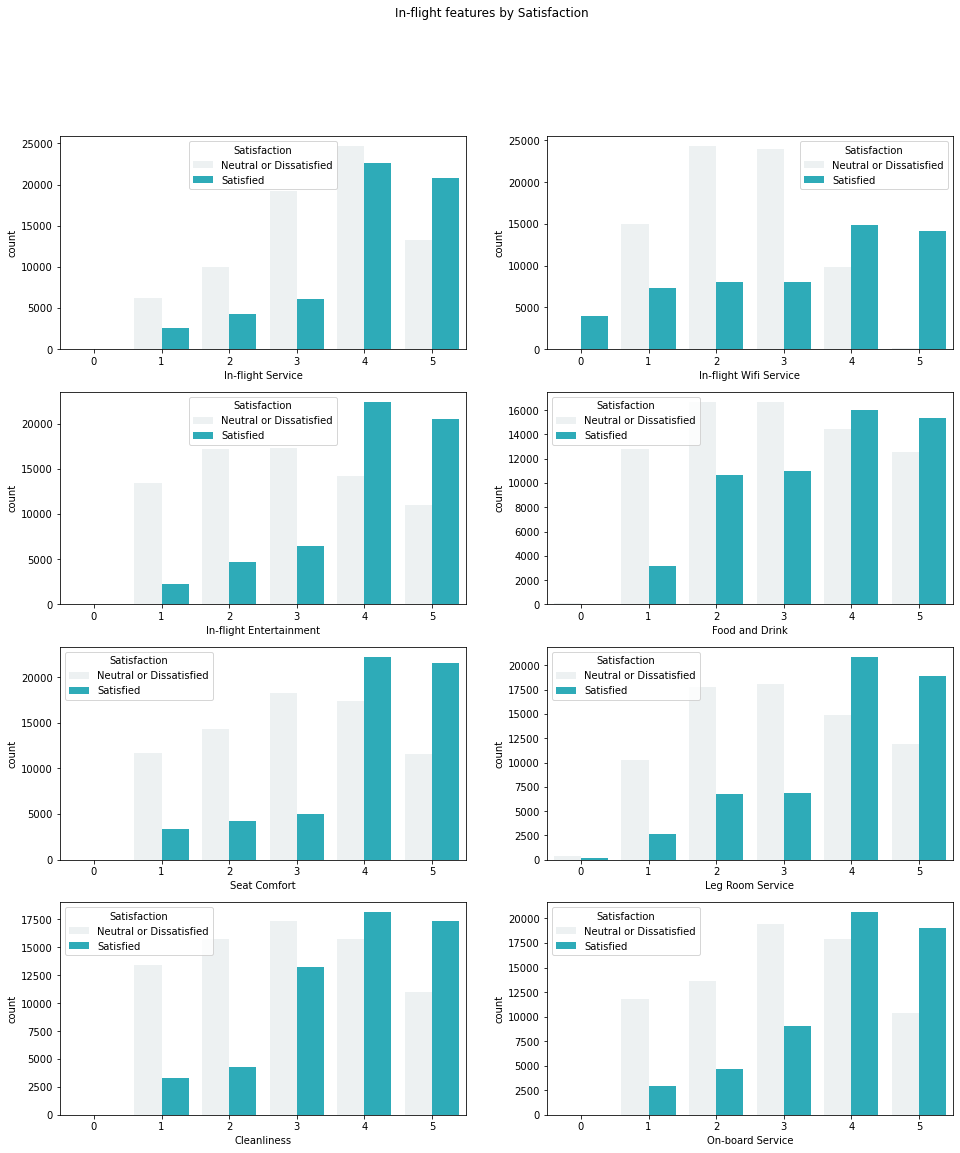

In [49]:
# plotting a clustered bar charts of Satisfaction and some ordinal variables

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=[16,18])
default_color = sns.color_palette()[9]

sns.countplot(data=df, x='In-flight Service', hue='Satisfaction', color=default_color, ax=axes[0,0])
sns.countplot(data=df, x='In-flight Wifi Service', hue='Satisfaction', color=default_color, ax=axes[0, 1])
sns.countplot(data=df, x='In-flight Entertainment', hue='Satisfaction', color=default_color, ax=axes[1, 0])
sns.countplot(data=df, x='Food and Drink', hue='Satisfaction', color=default_color, ax=axes[1, 1])
sns.countplot(data=df, x='Seat Comfort', hue='Satisfaction', color=default_color, ax=axes[2, 0])
sns.countplot(data=df, x='Leg Room Service', hue='Satisfaction', color=default_color, ax=axes[2, 1])
sns.countplot(data=df, x='Cleanliness', hue='Satisfaction', color=default_color, ax=axes[3, 0])
sns.countplot(data=df, x='On-board Service', hue='Satisfaction', color=default_color, ax=axes[3, 1])
fig.suptitle('In-flight features by Satisfaction')
plt.show()

In terms of **In-flight service**, the passengers who are satisfied rated it highly at 5, but there is a greater number of passengers who are dissatisfied by the In-flight service and rated it highly at 4.

In terms of **In-flight Wifi Service**, majority of the passenger were dissatisfied though their dissatisfaction ratings were low (2-3 ratings)

In terms of **In-flight Entertainment**, large number of passengers were satisfied with the entertainment and they rated high (4-5) for it.

In terms of **Food and Drink**, it had a high satisfaction rating of 4 and 5, this maybe coming from the business class, who enjoy the perks associated with it. But looking at the dissatisfaction, large numbers of passenger were either neutral or dissatisfied, though the ratings were low.

In terms of **Seat Comfort and Leg Room Service**, there is high number of satisfaction for both with a rating of 4 and 5. This rating may be from business class where there is great seat comfort and more leg room service. Therefore, it need further investigation among the classes.

In terms of **Cleanliness and On-board Service**, there is high satisfaction for both with a rating of 4 and 5. 

#### Exploring **Satisfaction** and other ordinal features

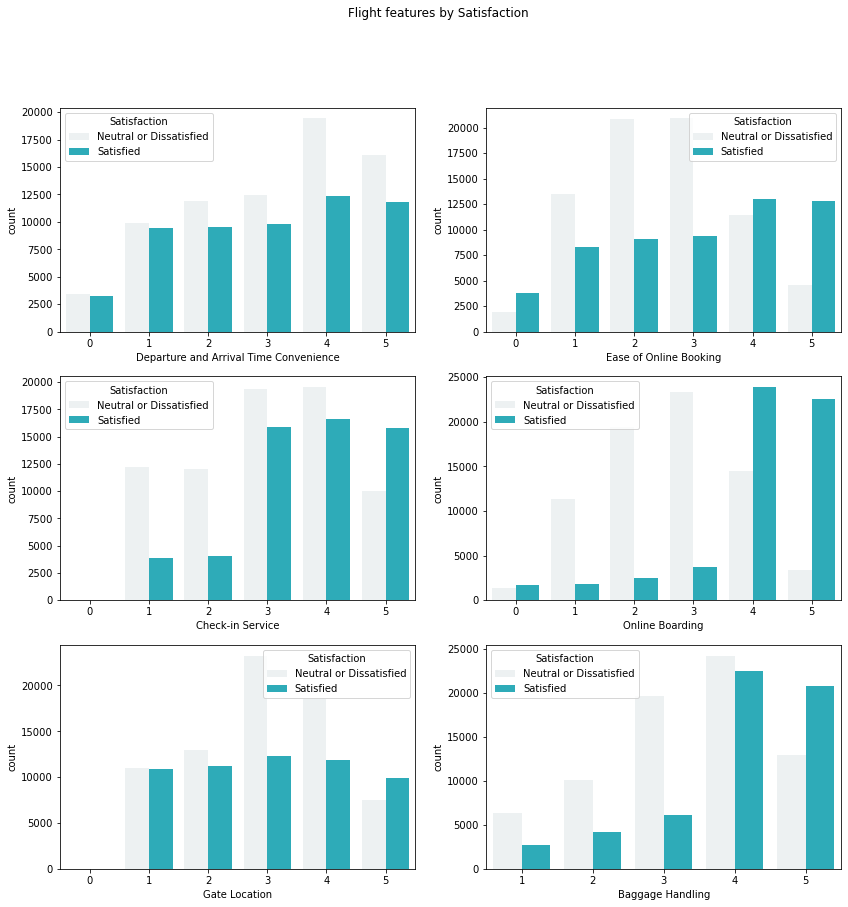

In [50]:
# plotting a clustered bar charts of Satisfaction and other ordinal variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[14,14])
default_color = sns.color_palette()[9]

sns.countplot(data=df, x='Departure and Arrival Time Convenience', hue='Satisfaction', color=default_color, ax=axes[0,0])
sns.countplot(data=df, x='Ease of Online Booking', hue='Satisfaction', color=default_color, ax=axes[0, 1])
sns.countplot(data=df, x='Check-in Service', hue='Satisfaction', color=default_color, ax=axes[1, 0])
sns.countplot(data=df, x='Online Boarding', hue='Satisfaction', color=default_color, ax=axes[1, 1])
sns.countplot(data=df, x='Gate Location', hue='Satisfaction', color=default_color, ax=axes[2, 0])
sns.countplot(data=df, x='Baggage Handling', hue='Satisfaction', color=default_color, ax=axes[2, 1])
fig.suptitle('Flight features by Satisfaction')
plt.show()

In terms of **Departure and Arrival Time Convenience**, a high rating of 4 and 5 was observed when i carrried out a univariate exploration of this feature. Exploring it against satisfaction showed that the high rating observed is more of dissatisfaction than satistaction.

In terms of **Ease of Online Booking**, there is a high number of dissatisfaction among the passengers though their dissatisfaction ratings were low (2-3 ratings)

In terms of **Check-in Service**, univariate exploration showed a high rating of 4, but bivarate exploration against satisfaction showed the rating constitute more number of dissatifaction among the passengers.

In terms of **Online Boarding**, it had a high number of satisfaction rating of 4 and 5, there is also high number of passengers who were dissatisfied but gave a low rating of 2-3

In terms of **Gate Location**, Large number of passengers are dissatisfied with the location of the gate as seen in the dissatifaction rating of 3 and 4.

In terms of **Baggage Handling**, there is high number of satisfaction among passengers for rating of 5, but high number of didssatisfaction can be seen at ratings of 4, 3 and 2

### Relationship between main features of interest and Satisfaction?

From the bivariate exploration of the satisfaction and some of the categorical features, it was observed that large number of passenger were dissatisfied among the returning passenger and the first-time customer.

The dissatisfaction occured greatly among passengers that uses Economy class and also in Economy Plus. The dissatisfaction occured greatly among the passengers travelling for personal reason, though there were high number of dissatisfaction among passsengers travelling for business purposes, the number of satisfaction was greater.

Exploring the main features of interest with **Satisfaction** reveals features that contributed to satisfaction and dissatisfaction. 

>The features that had high number of satisfaction at high ratings of 4 and 5 include: Inflight Entertainment, Seat Comfort, Leg Room Service, Cleanliness and On-board Service. Though these features had high number of satisfaction at high rating, there is greater number of dissatisfaction at low ratings of 3, 2 and 1

>The features that had high number of dissatisfaction with high ratings among the main features of interest include; In-flight Service, Food and Departure and Arrival Time Convenience. In-flight Wifi Service, Food and Drinks had high number of dissatisfaction but at low rating



### Relationships between the other features and Satisfaction?
Among the other features in the dataset, the following was observed
>Ease of Online Booking, Check-in Service, Gate Location and baggage handling had high number of dissatisfaction among the passengers. Online Boarding had high number of satisfactions at high ratings

<a id='multivariate'></a>
## Multivariate Exploration

In this section, I wish to further explore the **Satisfaction** level of the passengers based on the distance travelled.

#### Exploring Flight Distance against Satisfaction and some nominal features

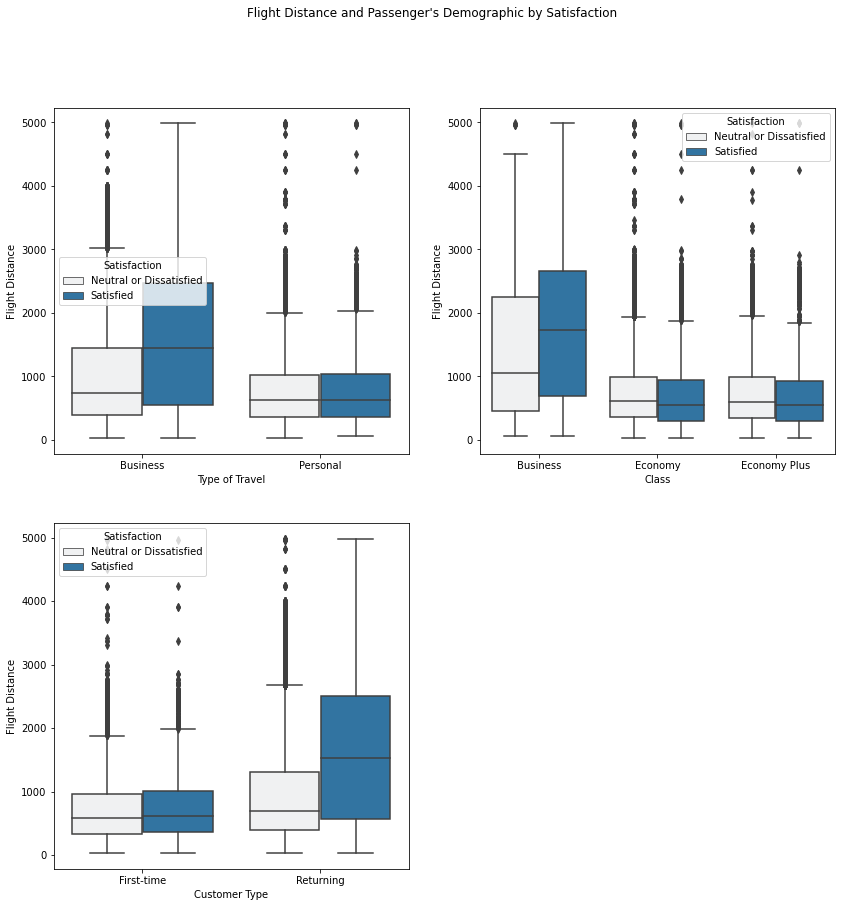

In [51]:
# plotting a boxplot of Flight Distance and some ordinal variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[14,14])
default_color = sns.color_palette()[0]

sns.boxplot(data=df, x='Type of Travel', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[0,0])
sns.boxplot(data=df, x='Class', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[0, 1])
sns.boxplot(data=df, x='Customer Type', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[1, 0])
fig.delaxes(axes[1][1])     #this code remove the empty subplot on the axes
fig.suptitle('Flight Distance and Passenger\'s Demographic by Satisfaction')
plt.show()

The above box plot shows that the passengers who travel **long distance** for **business purposes** and uses **business class** are more satisfied than the others. These satisfaction occured among the **returning(loyal)** passengers.

#### Exploring the numerical variable(Flight Distance) against Satisfaction and other Ordinal features

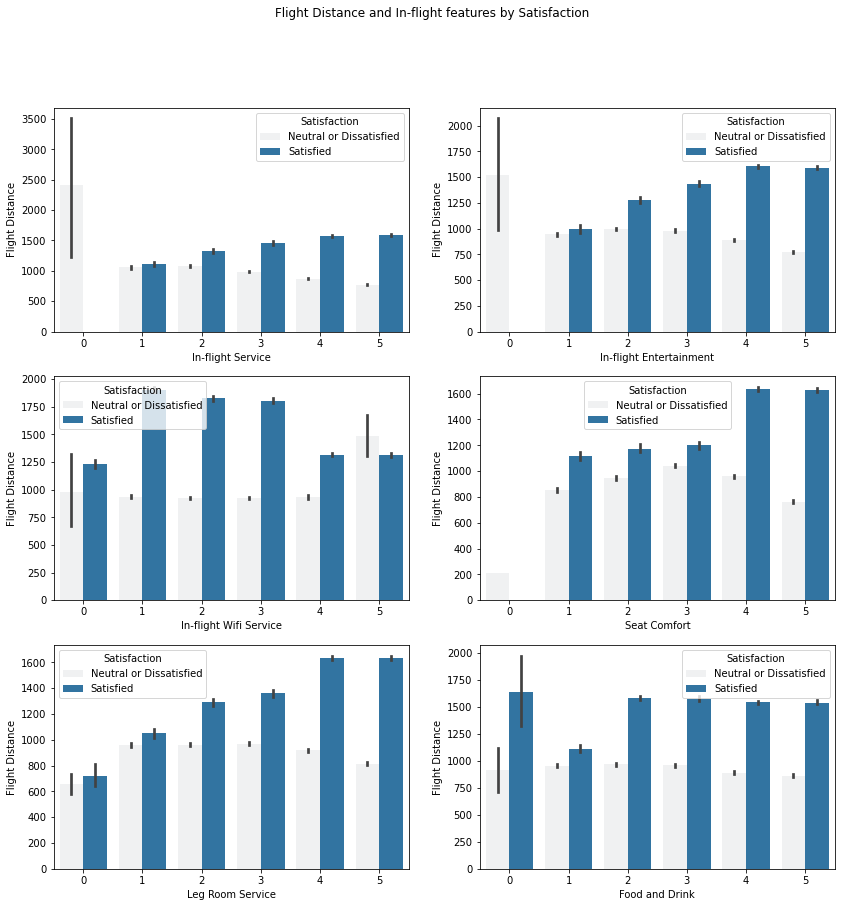

In [52]:
# plotting a barplot of Flight Distance and some ordinal variables by their satisfaction
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[14,14])
default_color = sns.color_palette()[0]

sns.barplot(data=df, x='In-flight Service', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[0, 0])
sns.barplot(data=df, x='In-flight Entertainment', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[0,1])
sns.barplot(data=df, x='In-flight Wifi Service', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[1, 0])
sns.barplot(data=df, x='Seat Comfort', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[1, 1])
sns.barplot(data=df, x='Leg Room Service', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[2, 0])
sns.barplot(data=df, x='Food and Drink', y='Flight Distance', hue='Satisfaction', color=default_color, ax=axes[2, 1])
fig.suptitle('Flight Distance and In-flight features by Satisfaction')
plt.show()

The above plot shows a pattern, as the mean distance travelled increases, the satisfaction ratings increases progressively from 1-5 for the following features; **In-flight Service, In-flight Entertainment, Seat Comfort and Leg Room Service**. This is to say that the **farther** the average distance travelled the **higher** the number of satisfaction of the passengers.

The **In-flight Wifi service** show a high rating of 5 with the highest mean distancein the bivariate exploration, which from the plot above is indicating that it constitute more of a dissatisfaction. The plot also shows that at longest average flight distance the passenger had a low satisfaction with the In-flight Wifi service. The Food and Drink did not show any pattern


#### Exploring the categorical variables (Class, Satisfaction against some of the ordinal features)

In the bivariate exploration of Satisfaction against each features, I was able to find out features that had high satisfaction and those with high dissatisfaction. But I don't know the flight class these satisfaction and dissatisfaction are coming from. So, in this section, i wish to investigation how the passengers rated their satisfaction for each features based on the different classes('Business', 'Economy', and 'Economy Plus')

In [121]:
# defining a function for plotting a FacetGrid of the countplot of classes for each features and their satisfaction
def plotFacetGrid(x):
    g = sns.FacetGrid(data=df, col='Class', hue='Satisfaction')   
    return (g.map(sns.countplot, x).add_legend())

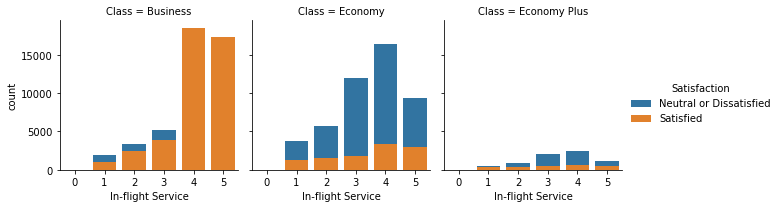

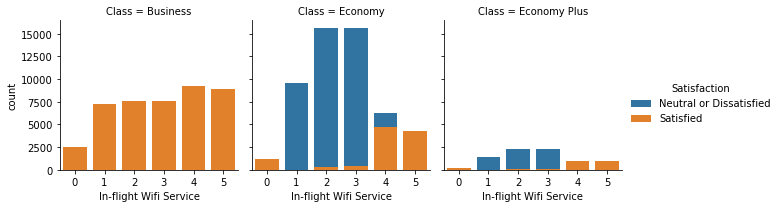

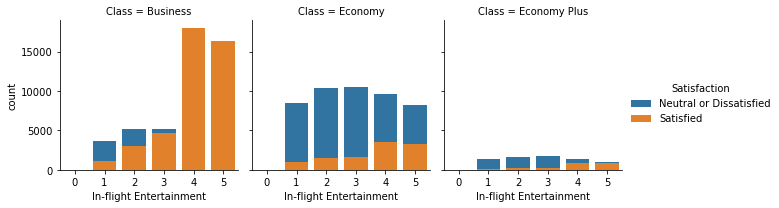

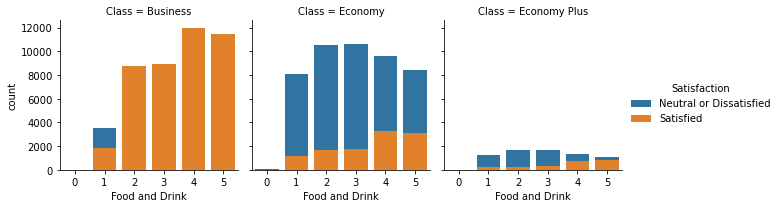

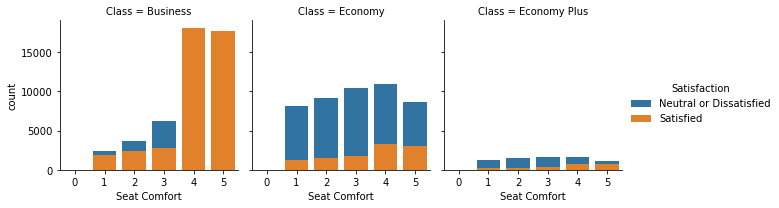

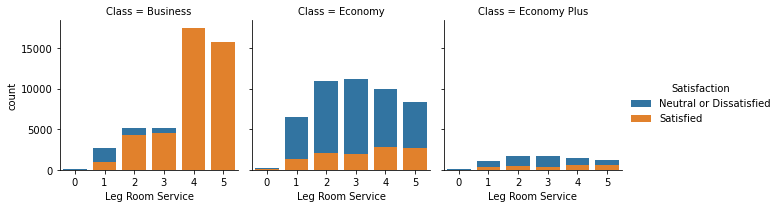

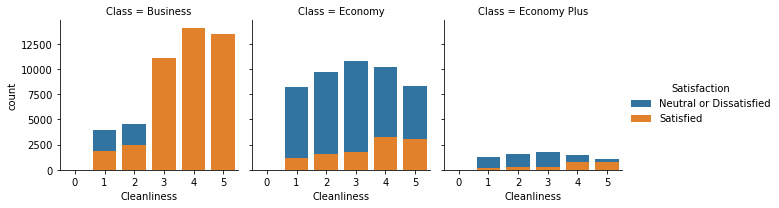

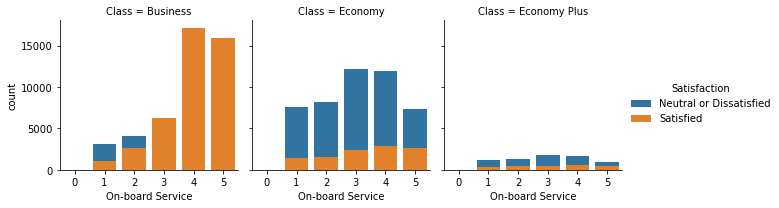

In [123]:
#Creating a list of categorical variable for the plot
cat_variables = ['In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 
                 'Food and Drink', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'On-board Service']

#Creating a loop to loop through the creates and call the function for plotting the Countplot
for x in cat_variables:
    plotFacetGrid(x)

The plot above shows that these features *In-flight Service, In-flight Entertainment, In-flight Wifi Service, Seat Comfort and Leg Room Service, Food and Drink, Cleanliness and On-board Service* are highly satisfied for business class passengers, but among the Economy class, the passengers were either dissatisfied or neutral.

The In-flight Service and In-flight Wifi Service show a high dissatisfaction among the Economy Class.

### Discussion

> When i extended my investigation of satisfaction with each of the main features of interest to the classes that the passengers belongs to, the multivariate exploration showed that passengers who travel using the business class rated the features of interest highly and were highly satisfied. Dissatisfaction was found mostly in the Economy class where the passengers do not enjoy the perks that business class do enjoy.


<a id='conclusion'></a>
## Conclusion
Large number of passengers are returning passenger and travels for business purposes and uses business class. The age range of the passengers occured between 30-50 with the median age at 40.

Majority of our returning customer travel longer distance for business purpose. The longer the flight distance, the more satisfied these passengers are with some of the features such as Seat Comfort, Leg Room Service, In-flight Entertainment and In-flight Service.

The features that contributed to the satisfaction are In-flight Entertainment, Seat Comfort, Leg Room Service, Cleanliness, On-board Service and these satisfaction were observed mostly among the passsengers that ply the business class

The features that contributed to the dissatisfaction of the passengers are In-flight Service, Food and Departure and Arrival Time Convenience, In-flight Wifi Service, Food and Drinks, Ease of Online Booking, Check-in Service, Gate Location and Baggage Handling. These dissatisfaction were observed mostly among passengers that ply the Economy class and Economy plus.


<ul>
<li><a href="#tab">Return to Table of Content</a></li>
</ul>